Exploratory Data Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Key analyses:
# 1. Attrition rate overall and by department
# 2. Salary distribution by role and gender
# 3. Correlation between satisfaction and performance
# 4. Age distribution and tenure analysis
# 5. Work-life balance vs attrition

# Example: Attrition rate by department
attrition_by_dept = df.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)

In [21]:
# Check if data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (1470, 35)

First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
# Basic data info
print("Column names and types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nBasic statistics:")
print(df.describe())

Column names and types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             in

Attrition distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


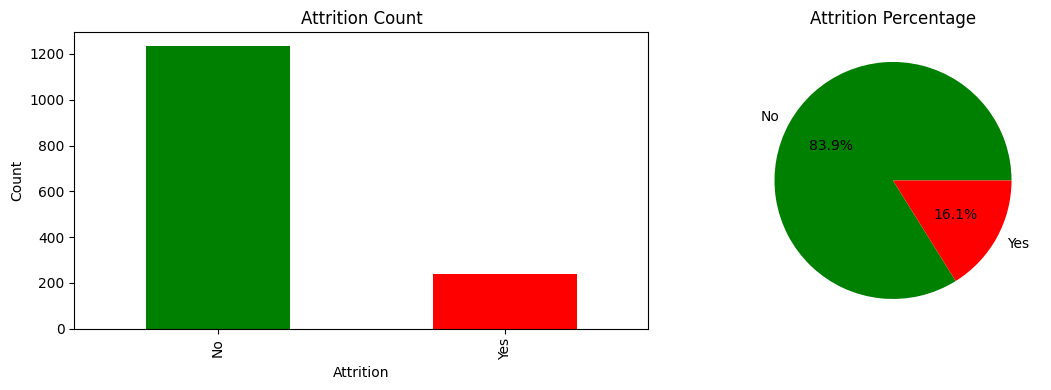

In [23]:
# Analyze the target variable
print("Attrition distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition percentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Visualize it
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df['Attrition'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Attrition Count')
ax[0].set_xlabel('Attrition')
ax[0].set_ylabel('Count')

# Percentage plot
df['Attrition'].value_counts(normalize=True).plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['green', 'red'])
ax[1].set_title('Attrition Percentage')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Attrition Rate by Department:
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64


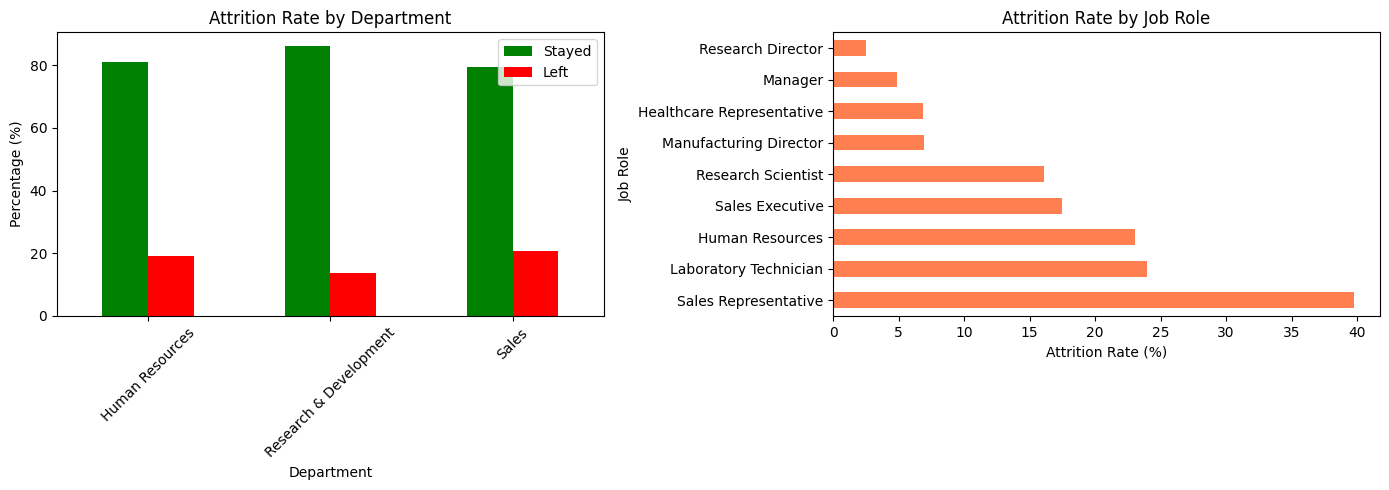

In [24]:
# Attrition by Department
print("Attrition Rate by Department:")
attrition_by_dept = df.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False)
print(attrition_by_dept)

# Visualize
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Department
dept_data = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
dept_data.plot(kind='bar', stacked=False, ax=ax[0], color=['green', 'red'])
ax[0].set_title('Attrition Rate by Department')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_xlabel('Department')
ax[0].legend(['Stayed', 'Left'])
ax[0].tick_params(axis='x', rotation=45)

# Job Role
role_attrition = df.groupby('JobRole')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

role_attrition.plot(kind='barh', ax=ax[1], color='coral')
ax[1].set_title('Attrition Rate by Job Role')
ax[1].set_xlabel('Attrition Rate (%)')
ax[1].set_ylabel('Job Role')

plt.tight_layout()
plt.show()

Statistical Testing

In [28]:
from scipy import stats

# T-test: Do employees who left have lower job satisfaction?
stayed = df[df['Attrition'] == 'No']['JobSatisfaction']
left = df[df['Attrition'] == 'Yes']['JobSatisfaction']

t_stat, p_value = stats.ttest_ind(stayed, left)

print("T-Test: Job Satisfaction vs Attrition")
print(f"Employees who stayed - Mean satisfaction: {stayed.mean():.2f}")
print(f"Employees who left - Mean satisfaction: {left.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ Result: STATISTICALLY SIGNIFICANT (p < 0.05)")
    print("   → Job satisfaction is significantly different between groups")
else:
    print("❌ Result: NOT significant (p >= 0.05)")

T-Test: Job Satisfaction vs Attrition
Employees who stayed - Mean satisfaction: 2.78
Employees who left - Mean satisfaction: 2.47
T-statistic: 3.9862
P-value: 0.000070
✅ Result: STATISTICALLY SIGNIFICANT (p < 0.05)
   → Job satisfaction is significantly different between groups


What this means: ✅ P-value = 0.00007 (much lower than 0.05 threshold) ✅ Employees who left had significantly lower job satisfaction (2.47 vs 2.78) ✅ This difference is NOT due to chance - it's a real pattern ✅ T-statistic = 3.99 indicates a strong effect

Business insight: Job satisfaction is a proven predictor of attrition. This is actionable for HR!



In [29]:
# Save the processed data for later use
df.to_csv(r'C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\data\cleaned_data.csv', index=False)
print("✅ Data saved successfully!")
print(f"Saved {len(df)} rows with {len(df.columns)} columns")

✅ Data saved successfully!
Saved 1470 rows with 39 columns


Feature Engineering


In [12]:
def engineer_features(df):
    """Create new features for analysis and modeling"""
    
    # Tenure categories
    df['TenureGroup'] = pd.cut(df['YearsAtCompany'], 
                                bins=[0, 2, 5, 10, 40],
                                labels=['0-2y', '2-5y', '5-10y', '10y+'])
    
    # Satisfaction score (composite)
    df['OverallSatisfaction'] = (
        df['JobSatisfaction'] + 
        df['EnvironmentSatisfaction'] + 
        df['RelationshipSatisfaction']
    ) / 3
    
    # Work-life balance flag
    df['PoorWorkLifeBalance'] = (df['WorkLifeBalance'] <= 2).astype(int)
    
    # Salary relative to role median
    df['SalaryVsMedian'] = df.groupby('JobRole')['MonthlyIncome'].transform(
        lambda x: (x - x.median()) / x.median()
    )
    
    return df

In [25]:
# Apply feature engineering to our dataset
df = engineer_features(df)

# Check the new features
print("New features created:")
print(df[['TenureGroup', 'OverallSatisfaction', 'PoorWorkLifeBalance', 'SalaryVsMedian']].head(10))

# Quick stats on new features
print("\nTenure Group Distribution:")
print(df['TenureGroup'].value_counts().sort_index())

New features created:
  TenureGroup  OverallSatisfaction  PoorWorkLifeBalance  SalaryVsMedian
0       5-10y             2.333333                    1       -0.038196
1       5-10y             3.000000                    0        0.776623
2         NaN             3.000000                    0       -0.275814
3       5-10y             3.333333                    0        0.007446
4        0-2y             2.333333                    0        0.201663
5       5-10y             3.666667                    1        0.063063
6        0-2y             1.666667                    1       -0.074844
7        0-2y             3.000000                    0       -0.066875
8       5-10y             3.000000                    0        0.477586
9       5-10y             2.666667                    1       -0.231097

Tenure Group Distribution:
TenureGroup
0-2y     298
2-5y     434
5-10y    448
10y+     246
Name: count, dtype: int64


Attrition Rate by Tenure Group:
TenureGroup
0-2y     28.859060
2-5y     13.824885
5-10y    12.276786
10y+      8.130081
Name: Attrition, dtype: float64


Attrition Rate by Work-Life Balance:
Good WLB    14.722753
Poor WLB    19.575472
Name: Attrition, dtype: float64


C:\Users\T35275\AppData\Local\Temp\ipykernel_5572\2513545489.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_attrition = df.groupby('TenureGroup')['Attrition'].apply(
C:\Users\T35275\AppData\Local\Temp\ipykernel_5572\2513545489.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sat_attrition = df.groupby(satisfaction_bins)['Attrition'].apply(


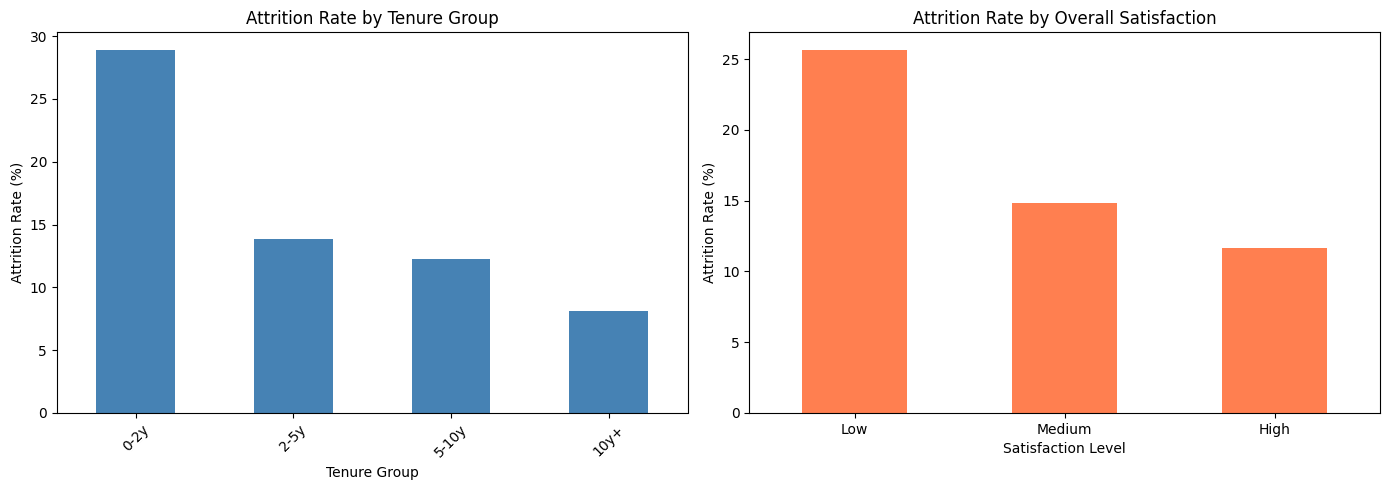

In [26]:
# Attrition by Tenure Group
print("Attrition Rate by Tenure Group:")
tenure_attrition = df.groupby('TenureGroup')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
print(tenure_attrition)

# Attrition by Work-Life Balance
print("\n" + "="*50)
print("\nAttrition Rate by Work-Life Balance:")
wlb_attrition = df.groupby('PoorWorkLifeBalance')['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
wlb_attrition.index = ['Good WLB', 'Poor WLB']
print(wlb_attrition)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Tenure
tenure_attrition.plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('Attrition Rate by Tenure Group')
ax[0].set_ylabel('Attrition Rate (%)')
ax[0].set_xlabel('Tenure Group')
ax[0].tick_params(axis='x', rotation=45)

# Satisfaction
satisfaction_bins = pd.cut(df['OverallSatisfaction'], bins=[0, 2, 3, 4], labels=['Low', 'Medium', 'High'])
sat_attrition = df.groupby(satisfaction_bins)['Attrition'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
sat_attrition.plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Attrition Rate by Overall Satisfaction')
ax[1].set_ylabel('Attrition Rate (%)')
ax[1].set_xlabel('Satisfaction Level')
ax[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

 Predictive Modeling 

Attrition Prediction Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib

# Prepare features (only numeric ones for now)
feature_cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 
    'JobSatisfaction', 'WorkLifeBalance', 'OverallSatisfaction',
    'DistanceFromHome', 'NumCompaniesWorked', 'YearsSinceLastPromotion'
]

# Create X (features) and y (target)
X = df[feature_cols].copy()
y = (df['Attrition'] == 'Yes').astype(int)

# Check for any missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nTarget distribution:")
print(y.value_counts())

Missing values in features:
Age                        0
MonthlyIncome              0
YearsAtCompany             0
JobSatisfaction            0
WorkLifeBalance            0
OverallSatisfaction        0
DistanceFromHome           0
NumCompaniesWorked         0
YearsSinceLastPromotion    0
dtype: int64

Target distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64


✅ No missing values in features and the target distribution is correct (237 left, 1233 stayed = ~16% attrition).

##### Train-Test Split and Model Training
Now let's split the data and train our Random Forest model.

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set attrition rate: {y_train.mean()*100:.1f}%")
print(f"Test set attrition rate: {y_test.mean()*100:.1f}%")

Training set size: 1176
Test set size: 294

Training set attrition rate: 16.2%
Test set attrition rate: 16.0%


##### Key observations:

Training set: 1,176 employees (80%)
Test set: 294 employees (20%)
Attrition rate is preserved in both sets (~16%) due to stratify=y
This means our model will train on representative data and be tested fairly. 

Train the Random Forest Model

In [32]:
# Train model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    random_state=42,
    class_weight='balanced'  # Handles the imbalanced data
)

print("Training model...")
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(f"\nPredictions made on {len(y_test)} test samples")

Training model...
✅ Model trained successfully!

Predictions made on 294 test samples


#### Evaluate Model Performance
Now let's see how well the model actually performs.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Print classification report
print("="*60)
print("MODEL PERFORMANCE REPORT")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"                Predicted: Stayed  |  Predicted: Left")
print(f"Actual: Stayed      {cm[0,0]:>6}        |      {cm[0,1]:>6}")
print(f"Actual: Left        {cm[1,0]:>6}        |      {cm[1,1]:>6}")

MODEL PERFORMANCE REPORT

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.82      0.85       247
        Left       0.28      0.36      0.31        47

    accuracy                           0.75       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.78      0.75      0.76       294


ROC-AUC Score: 0.670

Confusion Matrix:
                Predicted: Stayed  |  Predicted: Left
Actual: Stayed         203        |          44
Actual: Left            30        |          17


Key Performance Metrics:

📊 Overall Accuracy: 75% - Not bad, but let's look deeper

🎯 ROC-AUC: 0.670 - Moderate predictive power (0.5 = random, 1.0 = perfect)

Breaking down the results:

✅ For employees who STAYED:

Precision: 87% (when we predict "stayed", we're usually right)
Recall: 82% (we catch 82% of people who actually stayed)

⚠️ For employees who LEFT (the important class):

Precision: 28% (many false alarms)
Recall: 36% (we only catch 36% of people who actually left)
This means we're missing 64% of at-risk employees!
Confusion Matrix insights:

Correctly identified 17 out of 47 employees who left
Missed 30 employees who left (predicted they'd stay)
44 false alarms (predicted they'd leave but they stayed)



Feature Importance (Top Predictors of Attrition):
                   Feature  Importance
1            MonthlyIncome    0.253407
0                      Age    0.176578
2           YearsAtCompany    0.171043
6         DistanceFromHome    0.103505
5      OverallSatisfaction    0.088303
7       NumCompaniesWorked    0.081801
4          WorkLifeBalance    0.048174
8  YearsSinceLastPromotion    0.043143
3          JobSatisfaction    0.034046


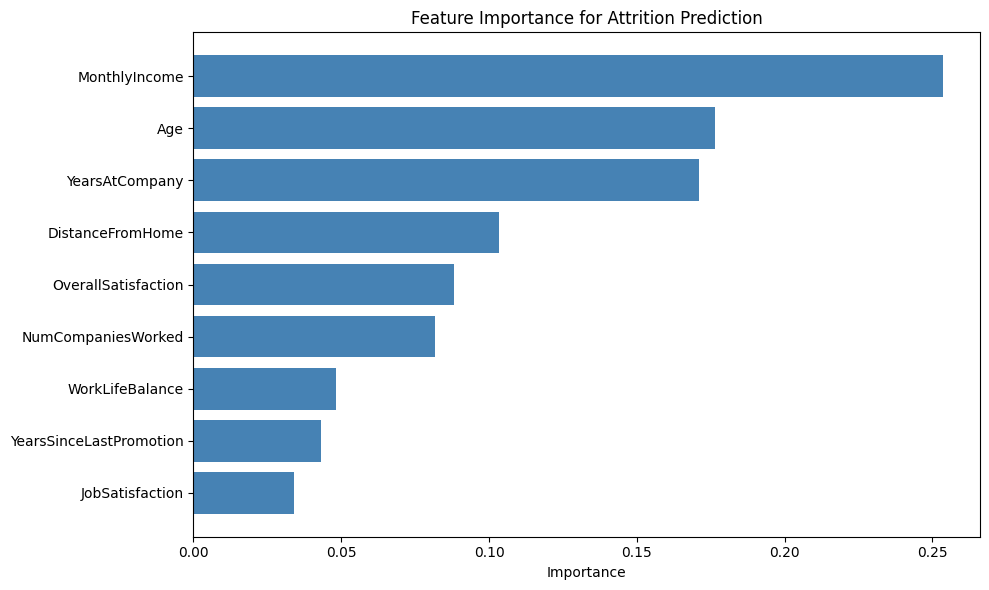

In [34]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Top Predictors of Attrition):")
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Attrition Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 3 Most Important Predictors:

MonthlyIncome (25.3%) - Salary is the #1 predictor!
Age (17.7%) - Younger employees may be more likely to leave
YearsAtCompany (17.1%) - This aligns with our earlier finding that 0-2 year employees have 28.9% attrition
Other notable factors:

DistanceFromHome (10.4%)
OverallSatisfaction (8.8%)
NumCompaniesWorked (8.2%)
Interesting observation: OverallSatisfaction is ranked 5th, even though our statistical test showed it was significant. This shows the model is finding that salary and tenure matter more than satisfaction alone.

In [35]:
import os

# Create models directory if it doesn't exist
models_dir = r'C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\models'
os.makedirs(models_dir, exist_ok=True)
print(f"✅ Models directory ready: {models_dir}")

✅ Models directory ready: C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\models


In [36]:
import joblib

# Save the model
model_path = r'C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\models\attrition_model.pkl'
joblib.dump(model, model_path)

print(f"✅ Model saved successfully!")
print(f"Location: {model_path}")
print(f"File size: {os.path.getsize(model_path) / 1024:.2f} KB")

✅ Model saved successfully!
Location: C:\Users\T35275\OneDrive - E.ON\Desktop\people-analytics-dashboard\models\attrition_model.pkl
File size: 468.37 KB


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import shap

def train_attrition_model(df):
    """Train attrition prediction model"""
    
    # Prepare features
    feature_cols = [
        'Age', 'MonthlyIncome', 'YearsAtCompany', 
        'JobSatisfaction', 'WorkLifeBalance', 'OverallSatisfaction',
        'DistanceFromHome', 'NumCompaniesWorked', 'YearsSinceLastPromotion'
    ]
    
    X = df[feature_cols]
    y = (df['Attrition'] == 'Yes').astype(int)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=50,
        random_state=42,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
    
    # Feature importance (SHAP for explainability)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # Save model
    joblib.dump(model, '../models/attrition_model.pkl')
    
    return model, explainer, shap_values

Dashboard Development

Streamlit Dashboard Structure

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from src.data_processing import engineer_features
from src.visualizations import *
import joblib

# Page config
st.set_page_config(
    page_title="People Analytics Dashboard",
    page_icon="👥",
    layout="wide"
)

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv('data/processed/cleaned_data.csv')
    return engineer_features(df)

df = load_data()
model = joblib.load('models/attrition_model.pkl')

# Sidebar filters
st.sidebar.header("Filters")
dept_filter = st.sidebar.multiselect(
    "Department",
    options=df['Department'].unique(),
    default=df['Department'].unique()
)

# Filter data
filtered_df = df[df['Department'].isin(dept_filter)]

# Main dashboard
st.title("👥 People Analytics Dashboard")
st.markdown("**Insights into workforce attrition, performance, and engagement**")

# KPIs row
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Total Employees", len(filtered_df))
with col2:
    attrition_rate = (filtered_df['Attrition'] == 'Yes').mean() * 100
    st.metric("Attrition Rate", f"{attrition_rate:.1f}%")
with col3:
    avg_tenure = filtered_df['YearsAtCompany'].mean()
    st.metric("Avg Tenure", f"{avg_tenure:.1f} years")
with col4:
    avg_satisfaction = filtered_df['JobSatisfaction'].mean()
    st.metric("Avg Job Satisfaction", f"{avg_satisfaction:.1f}/4")

# Tabs for different analyses
tab1, tab2, tab3, tab4 = st.tabs([
    "📊 Overview", 
    "🎯 Attrition Analysis", 
    "💼 Performance & Engagement",
    "🔮 Predictions"
])

with tab1:
    st.subheader("Workforce Overview")
    # Add demographic charts, tenure distribution, etc.
    # ...existing code...

with tab2:
    st.subheader("Attrition Deep Dive")
    # Attrition by department, role, tenure
    # Statistical tests results
    # ...existing code...

with tab3:
    st.subheader("Performance & Engagement Insights")
    # Satisfaction drivers
    # Performance ratings distribution
    # ...existing code...

with tab4:
    st.subheader("Attrition Risk Predictions")
    # Model performance metrics
    # High-risk employee list
    # SHAP feature importance
    # ...existing code...

Key Visualizations to Include

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def plot_attrition_by_category(df, category):
    """Bar chart of attrition rate by category"""
    attrition_pct = df.groupby(category)['Attrition'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).reset_index()
    
    fig = px.bar(
        attrition_pct,
        x=category,
        y='Attrition',
        title=f'Attrition Rate by {category}',
        labels={'Attrition': 'Attrition Rate (%)'},
        color='Attrition',
        color_continuous_scale='Reds'
    )
    return fig

def plot_satisfaction_distribution(df):
    """Box plot of satisfaction scores by attrition status"""
    fig = px.box(
        df,
        x='Attrition',
        y='OverallSatisfaction',
        title='Satisfaction Distribution by Attrition Status',
        color='Attrition'
    )
    return fig

def plot_shap_importance(shap_values, feature_names):
    """SHAP feature importance plot"""
    # Implementation using plotly
    # ...existing code...
    pass